# Data Project 3 - Detección de Enfermedad Cardíaca

Equipo 5: Francisco Javier Conejero Puche y Franziska Sophie Kröger

## INTRODUCCIÓN
### Objetivos
Este proyecto de datos tiene como objetivo la detección de enfermedad cardiaca mediante el análisis de un conjunto de datos que contiene información sobremúltiples pacientes con diferentes grados de enfermedad o ausencia de la misma.

Esta tarea parece sencilla, sin embargo, debemos ser conscientes de la importancia de proporcionar una solución a este tipo de problemas y el gran avance que supone en la práctica clínica. La detección temprana de enfermedades cardiovasculares en el momento del ingreso o la consulta médica puede salvar o mejorar la calidad de vida de los pacientes, por ello, desarrollar modelos precisos y eficientes puede ayudar a los profesionales médicos en la toma de decisiones clínicas y en la personalización de los tratamientos.

Este desafío consiste en entrenar un modelo de aprendizaje automático que pueda predecir la presencia de enfermedad en el corazón basándose en las características recogidas en diferentes pruebas médicas como variables clínicas.

### Dataset
El conjunto de datos está compuesto por 13 características adicionales que describen las condiciones de salud de cada uno de los pacientes. Además tiene la variable objetivo y una variable para dividir el conjunto para el entrenamiento y la validación. Todas variables se describen a continuación:

| Variable | Tipo de variable | Tipo de data | Descripción |
|---|---|---|---|
|**age**|cuantitativa discreta|int|edad del paciente|
|**sex**|categórica nominativa|int|género del paciente (1 = hombre; 0 = mujer)|
|**cp**|categórica nominativa|int|tipo de dolor de pecho (1 = angina típica; 2 = angina atípica; 3 = dolor no-anginoso; 4 = asintomático)|
|**trestbps**| cuantitativa discreta|int|presión arterial en reposo (en mm Hg al ingreso en el hospital)|
|**chol**|cuantitativa discreta|int|colesterol sérico en mg/dl|
|**fbs**|categórica nominativa|int|dolor provocado por el esfuerzo (1 = sí; 0 = no)|
|**restecg**|categórica nominativa|int|resultados electrocardiográficos en reposo (0 = normal; 1 = presenta anormalidad de la onda ST-T; 2 = presenta probable o definida hipertrofia ventricular izquierda)|
|**thalach**|cuantitativa discreta|int|frecuencia cardiaca en reposo|
|**exang**|categórica nominativa|int|angina inducida por el ejercicio (1 = sí; 0 = no)|
|**oldpeak**|cuantitativa continua|float|depresión del ST inducida por el ejercicio en relación con el reposo|
|**slope**|categórica nominativa|int|la pendiente del segmento ST en ejercicio máximo (1 = pendiente ascendente; 2 = plano; 3 = pendiente descendente)|
|**ca**|categórica nominativa|int|número de vasos mayores (0-3) coloreados por flouroscopia|
|**thal**|categórica nominativa|int|(3 = normal; 6 = defecto fijo; 7 = defecto reversible)|
|**label**|categórica nominativa|int|nuestro target; (0 = ausensia; 1 = caso leve; 2 = caso moderado; 3 = caso grave; 4 = caso muy grave)|
|**split**|categórica nominativa|str|identifica si esa muestra pertenece al conjunto de entrenamiento 'train' o de validación 'val'|

### Metodología
En las siguientes secciones describiremos los pasos que hemos seguido para desarrollar nuestro proyecto. Comenzaremos con el análisis y preprocesamiento de los datos, seguido de la selección del modelo y la evaluación de los resultados con un Grid Search. Por último, discutiremos las conclusiones que hemos extraído de nuestro trabajo.

## DATASET & LIBRERÍAS

In [ ]:
#%pip install xgboost
#%pip install fancyimpute

In [ ]:
# General & Maths 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preprocessing: Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, scale
from sklearn.linear_model import Lasso 
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
from fancyimpute import IterativeImputer as MICE 

# Models
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Load data / Cargar datos
df = pd.read_csv('dataset.csv')
df_test = pd.read_csv('test_dataset.csv')

## EXPLORATORY DATA ANALYSIS

### Descriptiva general

In [ ]:
# Show dataset dimensions / Imprimir dimensiones de los datasets
print(f'''El dataset df contiene {df.shape[0]} filas y {df.shape[1]} columnas.
El dataset df_test contiene {df_test.shape[0]} filas y {df_test.shape[1]} columnas.
''')

df.head(), df_test.head()

El dataset df contiene 866 filas y 15 columnas.
El dataset df_test contiene 50 filas y 13 columnas.



(    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 0  56.0  1.0  2.0     126.0  166.0  0.0      1.0    140.0    0.0      0.0   
 1  52.0  1.0  3.0     172.0  199.0  1.0      0.0    162.0    0.0      0.5   
 2  57.0  1.0  2.0     180.0  285.0  1.0      1.0    120.0    0.0      0.8   
 3  66.0  1.0  3.0     110.0  213.0  1.0      2.0     99.0    1.0      1.3   
 4  67.0  1.0  3.0     152.0  212.0  0.0      2.0    150.0    0.0      0.8   
 
    slope   ca  thal  label  split  
 0    NaN  NaN   NaN      0    val  
 1    1.0  0.0   7.0      0  train  
 2    NaN  NaN   NaN      1  train  
 3    2.0  NaN   NaN      0  train  
 4    2.0  0.0   7.0      1  train  ,
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 0  56.0  1.0  2.0     124.0  224.0  1.0      0.0    161.0    0.0      2.0   
 1  61.0  1.0  4.0     125.0    0.0  0.0      0.0    105.0    1.0      0.0   
 2  52.0  1.0  4.0     135.0    0.0  NaN      0.0    128.0    1.0      2.

In [ ]:
# Show dataset info / Imprimir información de los datasets
df.info(), '-'*15, df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       866 non-null    float64
 1   sex       866 non-null    float64
 2   cp        866 non-null    float64
 3   trestbps  809 non-null    float64
 4   chol      840 non-null    float64
 5   fbs       784 non-null    float64
 6   restecg   865 non-null    float64
 7   thalach   811 non-null    float64
 8   exang     811 non-null    float64
 9   oldpeak   806 non-null    float64
 10  slope     570 non-null    float64
 11  ca        297 non-null    float64
 12  thal      413 non-null    float64
 13  label     866 non-null    int64  
 14  split     866 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 101.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    ----------

(None, '---------------', None)

In [ ]:
# Distinguish between the target, categorical and numerical variables / Distinguir entre variables objetivo, categóricas y numéricas
categoricas = ['sex','cp','fbs','restecg','exang','slope','thal', 'ca']
numericas = ['age', 'trestbps','chol','thalach','oldpeak']
target = ["label"]

print("Las variables categóricas son: ", *categoricas)
print("Las variables númericas son: ", *numericas)
print("El target es: ", *target)

Las variables categóricas son:  sex cp fbs restecg exang slope thal ca
Las variables númericas son:  age trestbps chol thalach oldpeak
El target es:  label


In [ ]:
# Show variables distribution / Imprimir distribución de las variables
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,split
count,866.000000,866.000000,866.000000,809.000000,840.00000,784.000000,865.000000,811.000000,811.000000,806.000000,570.000000,297.000000,413.000000,866.000000,866
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,692
mean,53.436490,0.788684,3.254042,132.092707,199.42381,0.159439,0.603468,137.692972,0.385943,0.846650,1.761404,0.703704,5.050847,1.085450,NaN
std,9.471283,0.408478,0.919984,19.129122,109.65967,0.366318,0.805788,26.156664,0.487118,1.071277,0.618336,1.049334,1.925766,1.232356,NaN
min,28.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000,NaN
25%,47.000000,1.000000,3.000000,120.000000,176.75000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,NaN
50%,54.000000,1.000000,4.000000,130.000000,223.00000,0.000000,0.000000,140.000000,0.000000,0.450000,2.000000,0.000000,6.000000,1.000000,NaN
75%,60.000000,1.000000,4.000000,140.000000,267.25000,0.000000,1.000000,158.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000,NaN


In [ ]:
# Show unique values to get more information about the data / Imprimir valores únicos para obtener más información sobre los datos
for column in df:
  print(f'''Valores únicos de la columna {column}: 
  {df[column].unique()}
  ''')

Valores únicos de la columna age: 
  [56. 52. 57. 66. 67. 54. 59. 48. 73. 51. 45. 65. 53. 47. 55. 41. 61. 63.
 69. 62. 58. 35. 46. 44. 60. 43. 50. 39. 36. 34. 28. 32. 38. 49. 77. 72.
 75. 42. 33. 37. 64. 68. 74. 70. 31. 40. 71. 29. 30. 76.]
  
Valores únicos de la columna sex: 
  [1. 0.]
  
Valores únicos de la columna cp: 
  [2. 3. 4. 1.]
  
Valores únicos de la columna trestbps: 
  [126. 172. 180. 110. 152. 120. 170. 130. 160. 164. 125. 138.  nan 124.
 112. 150. 140. 178. 135.  95. 132.  96. 118. 128. 115. 145. 102. 105.
 134. 108. 100. 155. 144. 190. 142. 136. 122. 165. 104.   0. 154. 158.
 148. 116. 101. 106. 117. 129. 200. 156. 185.  98. 113. 127. 146. 114.
 174.  94. 123.  80. 192.  92.]
  
Valores únicos de la columna chol: 
  [166. 199. 285. 213. 212. 221. 326. 245.   0. 176. 240. 202. 188. 195.
 237. 223. 312. 243. 275. 327. 268. 260. 242. 256. 259.  nan 219. 308.
 167. 214. 286. 335. 246. 235. 193. 293. 247. 311. 218. 227. 339. 288.
 184. 305. 161. 132. 283. 274. 277. 529. 28

Based on the unique values shown above, we can see that most of the variables are integers, even tho indicated as float. That's why we convert them to int in the next step. /

Debido a que la mayoría de las variables son enteros, las convertimos a enteros en el siguiente paso.

In [ ]:
# Convert float to int / Convertir float a int
col = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope','ca','thal']
df[col] = df[col].astype('Int64')
df_test[col] = df_test[col].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       866 non-null    Int64  
 1   sex       866 non-null    Int64  
 2   cp        866 non-null    Int64  
 3   trestbps  809 non-null    Int64  
 4   chol      840 non-null    Int64  
 5   fbs       784 non-null    Int64  
 6   restecg   865 non-null    Int64  
 7   thalach   811 non-null    Int64  
 8   exang     811 non-null    Int64  
 9   oldpeak   806 non-null    float64
 10  slope     570 non-null    Int64  
 11  ca        297 non-null    Int64  
 12  thal      413 non-null    Int64  
 13  label     866 non-null    int64  
 14  split     866 non-null    object 
dtypes: Int64(12), float64(1), int64(1), object(1)
memory usage: 111.8+ KB


In [ ]:
# Basic statistics grouped by output / Estadísticas básicas grupado por output
df.groupby(['label']).describe().loc[:,(slice(None),['mean','std'])]

age                 sex                  cp            \
            mean       std      mean       std      mean       std   
label                                                                
0      50.511278  9.472215  0.651629  0.477052  2.774436   0.90184   
1      54.351351  9.267217  0.881081  0.324571  3.578378  0.790959   
2      56.104839  8.365452  0.919355  0.273394  3.741935  0.648588   
3          58.16  7.851854     0.936  0.245738     3.696  0.662644   
4      55.757576  8.681987  0.878788  0.331434  3.727273    0.6742   

         trestbps                   chol              ...     exang            \
             mean        std        mean         std  ...      mean       std   
label                                                 ...                       
0      130.013193  16.897836  227.782723   76.617963  ...   0.14248  0.350004   
1      130.325581  20.033564  169.130435  120.540651  ...  0.517442  0.501155   
2      134.163793  18.271833   169.05042  138.195198  ...  0.589744  0.493996   
3      137.855856  23.750157  178.844262  127.480611  ...  0.705357  0.457931   
4      138.935484  19.017423  225.666667    98.96043  ...  0.709677  0.461414   

        oldpeak               slope                  ca                thal  \
           mean       std      mean       std      mean       std      mean   
label                                                                         
0      0.413757  0.712280  1.485714  0.612693  0.341615  0.942772  3.983516   
1      0.808187  0.953657  1.818841  0.582413  0.754386  0.871794  5.701031   
2      1.268103  1.179285  1.968421  0.573393      1.25  0.983739  5.847458   
3      1.610909  1.243799  1.969388  0.526691  1.485714  0.981338  6.135593   
4      2.048387  1.274067  2.103448  0.488791  1.583333  1.240112    6.3125   

                 
            std  
label            
0      1.683443  
1      1.797944  
2      1.648548  
3      1.547608  
4      1.352467  

[5 rows x 26 columns]

### Descriptiva univariante

In [ ]:
# Show Frequency Table for the output / Imprimir tabla de frecuencia para el output
tab = pd.crosstab(index=df['label'], columns='percentage')
round(tab/tab.sum()*100, 2)

col_0,percentage
label,
0,46.07
1,21.36
2,14.32
3,14.43
4,3.81


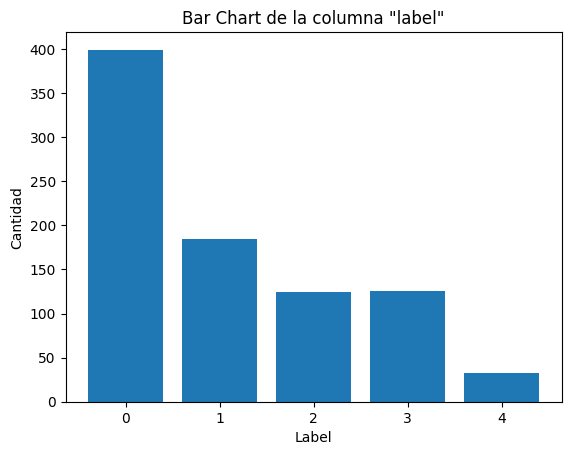

In [ ]:
# Description of the output: Bar Chart / Descriptiva del output: Bar Chart
label_counts = df['label'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Cantidad')
plt.title('Bar Chart de la columna "label"')
plt.show()

Descriptiva de las variables categóricas: Porcentaje con diagramas de sectores 


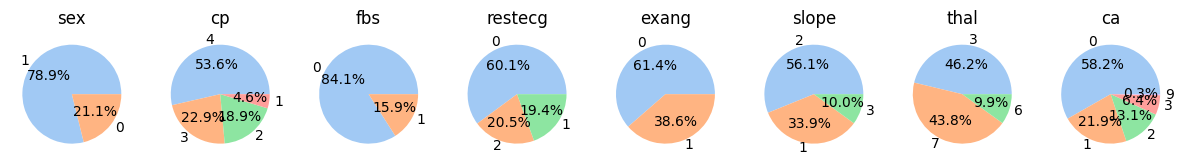

In [ ]:
# Description of the categorical variables: Pie Charts / Descriptiva de las variables categóricas: Diagramas de sectores 
fig, axes = plt.subplots(1, len(categoricas), figsize=(15, 5))
colors = sns.color_palette('pastel')[0:5]

for idx, var in enumerate(categoricas):
    counts = df[var].value_counts()
    axes[idx].pie(counts, labels=counts.index, colors = colors, autopct='%1.1f%%')
    axes[idx].set_title(var)

print('Descriptiva de las variables categóricas: Porcentaje con diagramas de sectores ')
plt.show()

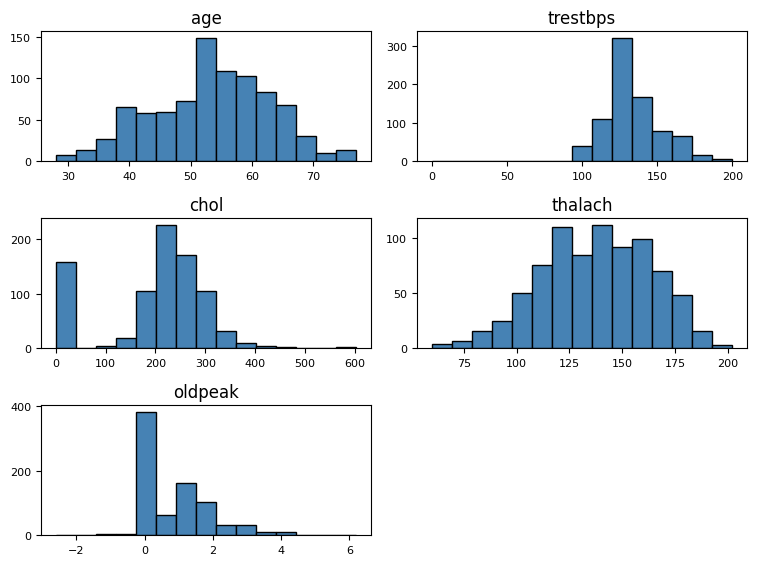

In [ ]:
# Description of the numeric variables: Histograms / Descriptiva de las variables númericas: Histogramas
df[numericas].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

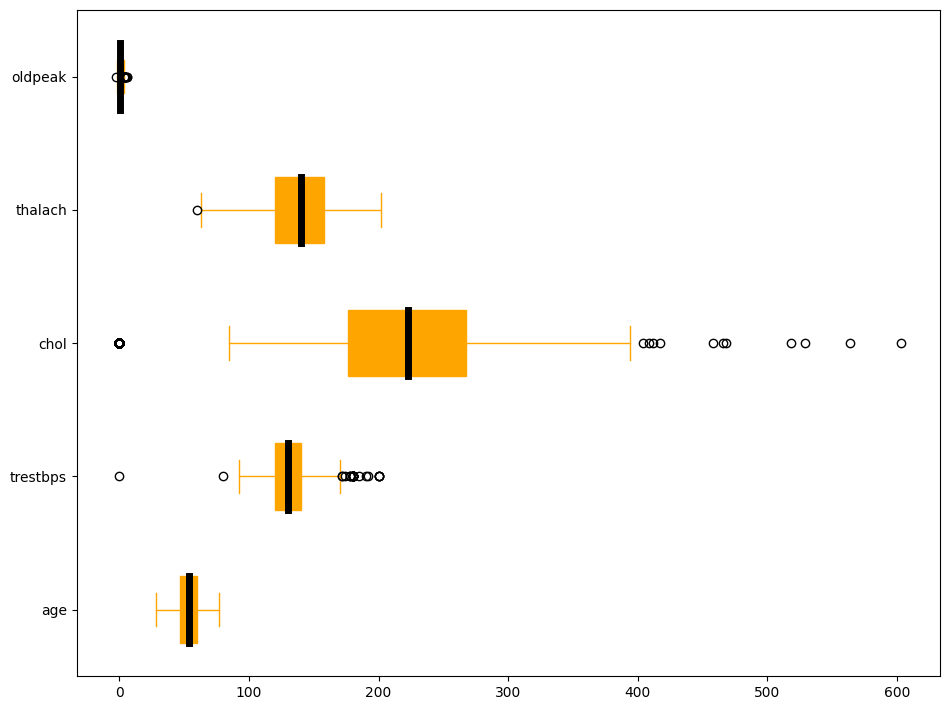

In [ ]:
# Description of the numeric variables: Boxplots / Descriptiva de las variables númericas: Diagrama de cajas
medianprops = dict(linestyle='-', linewidth=5, color='black')

df[numericas].boxplot(color='orange', vert= False, patch_artist=True, medianprops=medianprops, grid=False)    
plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

### Descriptiva bivariante

C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (m

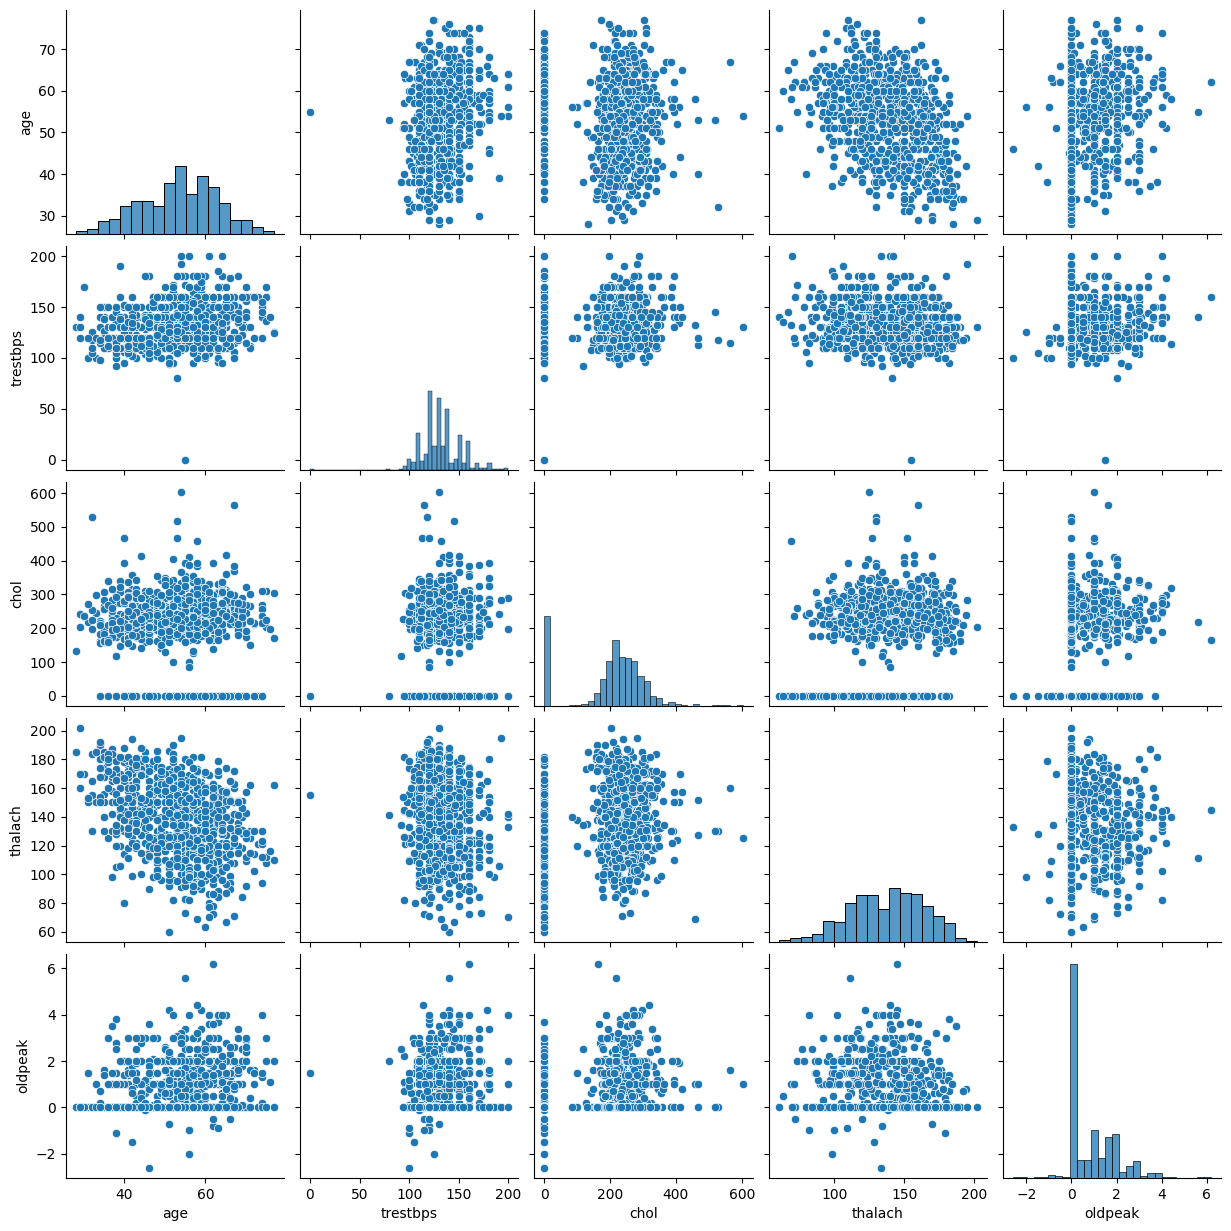

In [ ]:
# Plot numeric variables as a pairplot to show the relationship between them/ Plotear variables númericas como pairplotpara mostrar la relación entre lellas
sns.pairplot(df[numericas], diag_kind = 'hist')

In [ ]:
# Get the correlation matrix for numeric variables as table / Obtener la matriz de correlación para variables númericas como tabla
df_corr = df[numericas].corr()
df_corr

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.245349,-0.103973,-0.373247,0.244317
trestbps,0.245349,1.000000,0.076583,-0.107466,0.146157
chol,-0.103973,0.076583,1.000000,0.245580,0.046745
thalach,-0.373247,-0.107466,0.245580,1.000000,-0.154380
oldpeak,0.244317,0.146157,0.046745,-0.154380,1.000000


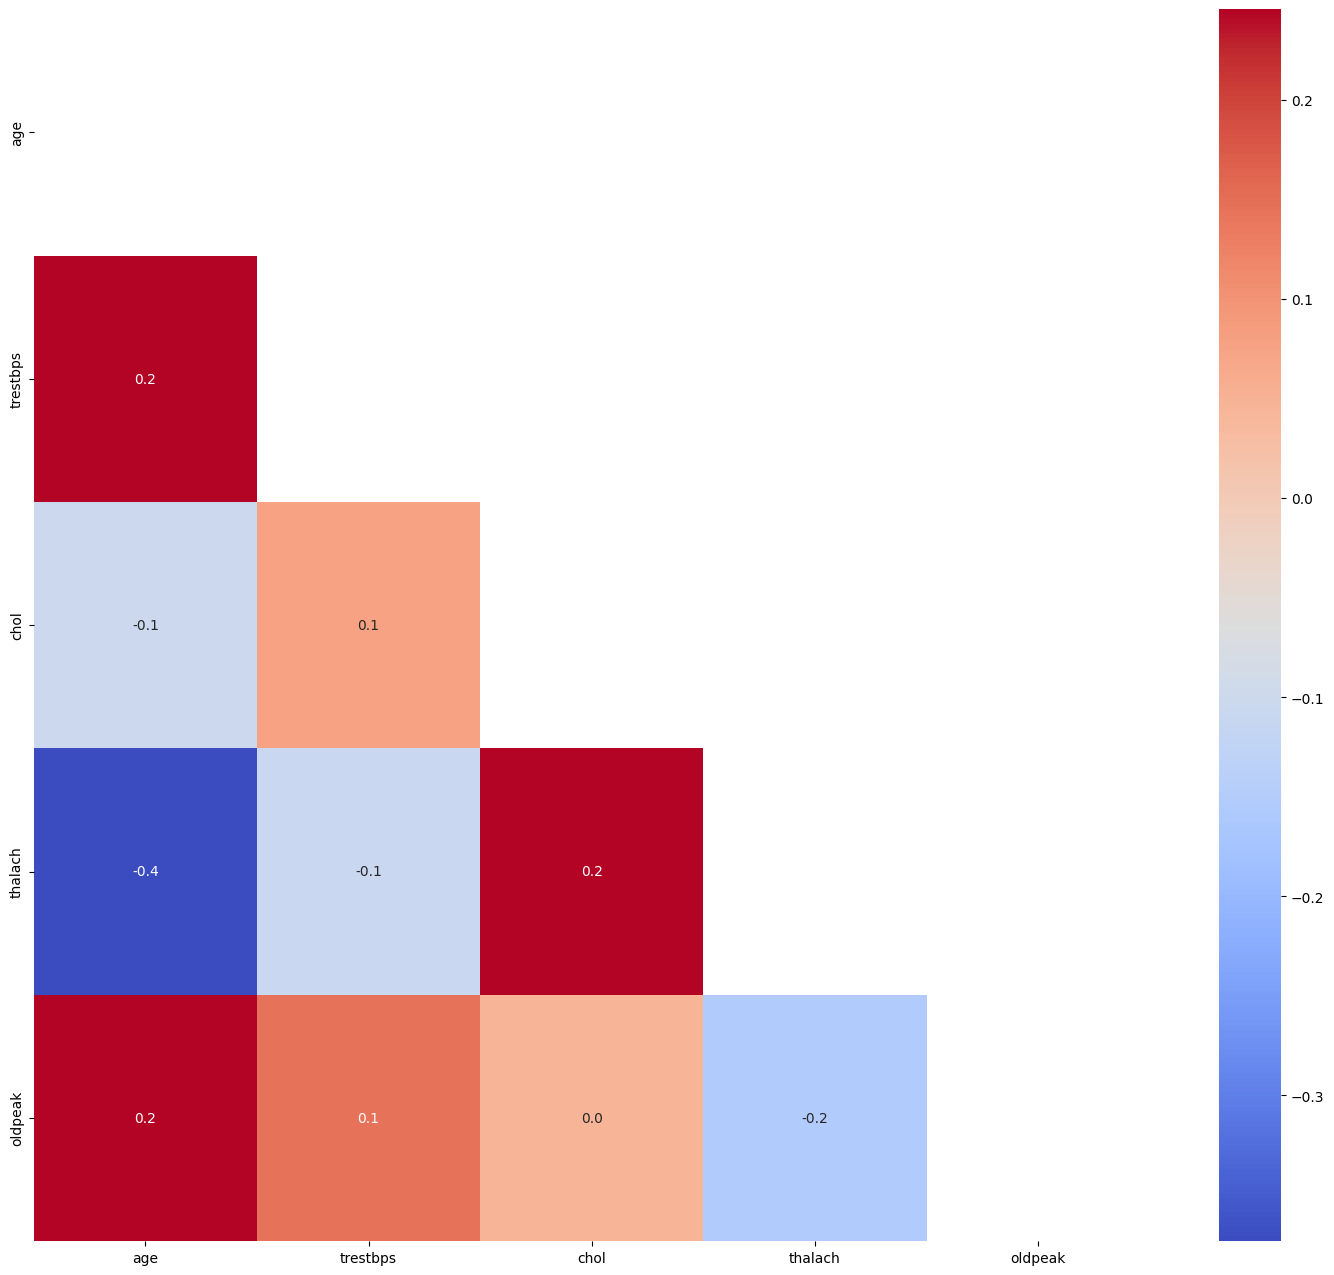

In [ ]:
# Get the correlation matrix  for numeric variables as chart / Obtener la matriz de correlación para variables númericas como gráfico
plt.figure(figsize=(18,16))
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='coolwarm')
plt.show()

## PREPROCESAMIENTO DE LOS DATOS

**Resumen de los pasos del preprocesamiento**
1. Establacer **target** (qué variable quieres predicir)
2. **Seleccionar variables** (cúales variables quieres usar para predecir)
3. Eliminar variables **constantes** (si hay variables que no cambian, se eliminan porque no aportan valor)
4. Eliminar variables **no informativas** (si hay variables que no aportan información, se eliminan)
5. Rellenar **missing values** (si hay valores nulos, se rellenan con la media, mediana, moda, etc)
6. **Agrupar** categorías (si hay categorías con muy pocos ejemplos, se agrupan en una categoría "otros")
7. **One Hot Encoding** (si hay variables categóricas, se convierten a variables numéricas)
8. **Escalado** de variables (si hay variables con diferentes escalas, se escalan a la misma escala)
9. Eliminar variables **irrelevantes** (si hay variables que no aportan valor según sus correlaciones, se eliminan)
10. Eliminar variables **redundantes** (si hay variables que son redundantes (alta correlación entre ellas), se eliminan)
11. **Oversampling** (si hay desbalance de clases, se añaden más ejemplos de la clase minoritaria)
12. **Variable Importance** (hacer un ranking de los variables)
13. **PCA** (si hay muchas variables, se reducen dimensiones/ a un número menor de variables)

### 1) Establecer target

As the objective of this project is to predict the presence of heart disease, we will use the variable 'label' as our target. We don't need to do any transformation to the target variable, as it is already in the format we need. / 

Como el objetivo de este proyecto es predecir la presencia de enfermedad cardíaca, usaremos la variable 'label' como nuestro target. No necesitamos hacer ninguna transformación a la variable objetivo, ya que ya está en el formato que necesitamos.




### 2) Selecionar variables y eliminar outliers


At the beginning  of the project, we'll analyse all the variables and then we'll select the ones that we consider more relevant based on the EDA that is yet to come. /

Al principio del proyecto, analizaremos todas las variables y luego seleccionaremos las que consideremos más relevantes en función del EDA que está por venir.

In [ ]:
# Show distribution of numeric variables / Imprimir distribución de las variables númericas
df[numericas].describe(), '/n', df_test[numericas].describe()

(            age    trestbps       chol     thalach     oldpeak
 count     866.0       809.0      840.0       811.0  806.000000
 mean   53.43649  132.092707  199.42381  137.692972    0.846650
 std    9.471283   19.129122  109.65967   26.156664    1.071277
 min        28.0         0.0        0.0        60.0   -2.600000
 25%        47.0       120.0     176.75       120.0    0.000000
 50%        54.0       130.0      223.0       140.0    0.450000
 75%        60.0       140.0     267.25       158.0    1.500000
 max        77.0       200.0      603.0       202.0    6.200000,
 '/n',
             age    trestbps        chol   thalach    oldpeak
 count      50.0        48.0        46.0      50.0  48.000000
 mean      55.12  132.979167  194.086957    134.94   1.366667
 std    7.922172   18.014757  130.567109  22.18421   1.280514
 min        35.0        94.0         0.0      92.0   0.000000
 25%        50.0       120.0       38.25     120.0   0.000000
 50%        56.0       130.0       222.0    

In [ ]:
# Show distribution of categoric variables / Imprimir distribución de las variables categóricas
df[categoricas].astype('category').describe(), '/n', df_test[categoricas].astype('category').describe()

(        sex   cp  fbs  restecg  exang  slope  thal   ca
 count   866  866  784      865    811    570   413  297
 unique    2    4    2        3      2      3     3    5
 top       1    4    0        0      0      2     3    0
 freq    683  464  659      520    498    320   191  173,
 '/n',
         sex  cp  fbs  restecg  exang  slope  thal  ca
 count    50  50   43       49     50     38    20  12
 unique    2   4    2        3      2      3     3   4
 top       1   4    0        0      0      2     7   0
 freq     39  31   31       29     27     24    11   7)

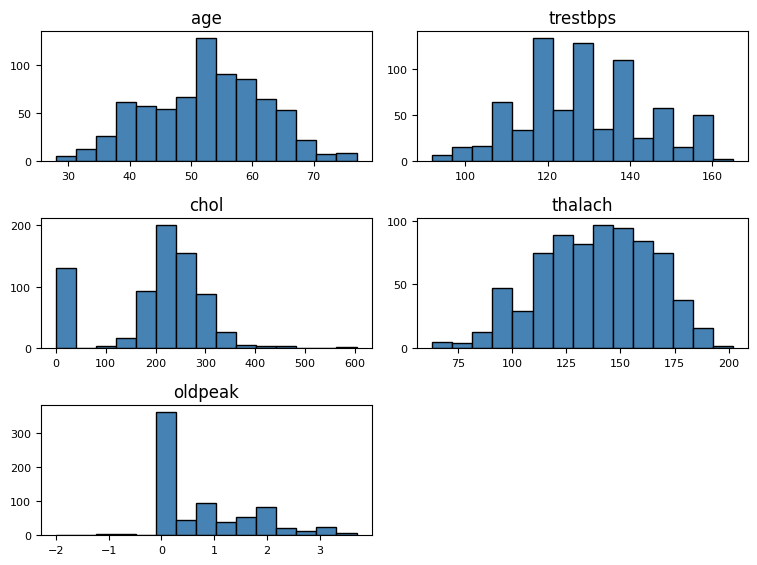

In [ ]:
# Delete outliers of numeric variables depending on its quartils / Eliminar outliers de variables númericas dependiendo de sus cuartiles
col_outliers = ['age', 'trestbps','thalach','oldpeak']

for col in df[col_outliers]:
    # calculate quartiles / calcular cuartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # calculate interquartile range (IQR) / calcular rango intercuartil (IQR)
    IQR = Q3 - Q1

    # calculate lower and upper bounds for outlier detection / calcular límites inferior y superior para la detección de outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # filter out outliers / filtrar outliers
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    # reset index / resetear índice
    df = df.reset_index(drop=True)

df[numericas].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

### 3) Eliminar variables constantes

Based on the descriptive analysis, there are no constant variables, therefore there is no need to eliminate any variable. /

Según el análisis descriptivo no hay variables constantes, por lo tanto no hace falta eliminar ninguna variable.

### 4) Eliminar variables no informativas

In [ ]:
# Detect missing values / detectar valores nulos
df.apply(lambda x: round(100*np.sum(x.isna())/len(x),2)), '-'*15, df_test.apply(lambda x: round(100*np.sum(x.isna())/len(x),2))

(age          0.00
 sex          0.00
 cp           0.00
 trestbps     0.00
 chol         2.80
 fbs          9.87
 restecg      0.13
 thalach      0.00
 exang        0.00
 oldpeak      0.00
 slope       29.73
 ca          62.80
 thal        49.73
 label        0.00
 split        0.00
 dtype: float64,
 '---------------',
 age          0.0
 sex          0.0
 cp           0.0
 trestbps     4.0
 chol         8.0
 fbs         14.0
 restecg      2.0
 thalach      0.0
 exang        0.0
 oldpeak      4.0
 slope       24.0
 ca          76.0
 thal        60.0
 dtype: float64)

As we can see in the descriptive analysis, the variables 'thal' and 'ca' have most of their values as NA, so it seems that those variables don't add value and therefore, we drop them. /

Como la mayoría de los valores de las columnas 'thal' y 'ca' son <NA>, parece que esas variables no aportan valor y por lo tanto, las quitamos.

In [ ]:
# Delete variables thal and ca / eliminar variables thal y ca
df.drop(['thal', 'ca'], axis =1, inplace=True)
df_test.drop(['thal', 'ca'], axis =1, inplace=True)

categoricas = ['sex','cp','fbs','restecg','exang','slope']

df.head(), '-'*80, df_test.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   56    1   2       126   166    0        1      140      0      0.0   <NA>   
 1   66    1   3       110   213    1        2       99      1      1.3      2   
 2   67    1   3       152   212    0        2      150      0      0.8      2   
 3   54    0   2       120   221    0        0      138      0      1.0      1   
 4   48    1   2       130   245    0        0      160      0      0.0   <NA>   
 
    label  split  
 0      0    val  
 1      0  train  
 2      1  train  
 3      0    val  
 4      0  train  ,
 '--------------------------------------------------------------------------------',
    age  sex  cp  trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope
 0   56    1   2       124   224     1        0      161      0      2.0      2
 1   61    1   4       125     0     0        0      105      1      0.0      3
 2   52    1   4       135     0  <NA>        0      128      1   

### 5) Rellenar missing values

In [ ]:
# Fill missing values of numeric variables with MICE / Rellenar valores nulos de variables númericas con MICE
def fill_mv_num(df):
    df_new = df.copy()
    df_new[numericas] = MICE(estimator = Lasso()).fit_transform(df[numericas])
    return df_new

df = fill_mv_num(df)
df_test = fill_mv_num(df_test)

In [ ]:
# Check replaced missing values of numeric variables / Comprobar el replazado de los valores nulos de las variables númericas
df.apply(lambda x: round(100*np.sum(x.isna())/len(x),2)), '-'*15, df_test.apply(lambda x: round(100*np.sum(x.isna())/len(x),2))

(age          0.00
 sex          0.00
 cp           0.00
 trestbps     0.00
 chol         0.00
 fbs          9.87
 restecg      0.13
 thalach      0.00
 exang        0.00
 oldpeak      0.00
 slope       29.73
 label        0.00
 split        0.00
 dtype: float64,
 '---------------',
 age          0.0
 sex          0.0
 cp           0.0
 trestbps     0.0
 chol         0.0
 fbs         14.0
 restecg      2.0
 thalach      0.0
 exang        0.0
 oldpeak      0.0
 slope       24.0
 dtype: float64)

In [ ]:
# Calculate the mode for categoric variables / Calcular la moda para variables categóricas
modes = df[categoricas].mode(axis=0, dropna=True).iloc[0].to_dict()

modes

{'sex': 1, 'cp': 4, 'fbs': 0, 'restecg': 0, 'exang': 0, 'slope': 2}

In [ ]:
# Fill missing values of categoric variables with mode / Rellenar valores nulos de variables categóricas con la moda
df = df.fillna(value = modes, axis = 0)
df_test = df_test.fillna(value = modes, axis = 0)

df.head(), '-'*80, df_test.head()

(    age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 0  56.0    1   2     126.0  166.0    0        1    140.0      0      0.0   
 1  66.0    1   3     110.0  213.0    1        2     99.0      1      1.3   
 2  67.0    1   3     152.0  212.0    0        2    150.0      0      0.8   
 3  54.0    0   2     120.0  221.0    0        0    138.0      0      1.0   
 4  48.0    1   2     130.0  245.0    0        0    160.0      0      0.0   
 
    slope  label  split  
 0      2      0    val  
 1      2      0  train  
 2      2      1  train  
 3      1      0    val  
 4      2      0  train  ,
 '--------------------------------------------------------------------------------',
     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 0  56.0    1   2     124.0  224.0    1        0    161.0      0      2.0   
 1  61.0    1   4     125.0    0.0    0        0    105.0      1      0.0   
 2  52.0    1   4     135.0    0.0    0        0    128.0      

In [ ]:
# Check replaced missing values of categoric variables / Comprobar el replazado de los valores nulos de las variables categóricas
df.apply(lambda x: round(100*np.sum(x.isna())/len(x),2)), '-'*15, df_test.apply(lambda x: round(100*np.sum(x.isna())/len(x),2))

(age         0.0
 sex         0.0
 cp          0.0
 trestbps    0.0
 chol        0.0
 fbs         0.0
 restecg     0.0
 thalach     0.0
 exang       0.0
 oldpeak     0.0
 slope       0.0
 label       0.0
 split       0.0
 dtype: float64,
 '---------------',
 age         0.0
 sex         0.0
 cp          0.0
 trestbps    0.0
 chol        0.0
 fbs         0.0
 restecg     0.0
 thalach     0.0
 exang       0.0
 oldpeak     0.0
 slope       0.0
 dtype: float64)

### 6) Agrupar valores

Based on the univariate descriptive analysis of each variable that we have left in the dataset, we don't think it's necessary to group values into a new category (e.g. 'others'), as there is no category with less than 5% of the values in total. /

Según la descriptiva univariante de cada variable que nos queda en el dataset, no pensamos que haga falta agrupar valores a una nueva categoría (p.ej. 'otros'), ya que no hay ninguna categoría con menos de 5% de los valores en total.


### 7) One Hot Encoding

In [ ]:
# Define function for one hot encoding / Definir función para one hot encoding
def one_hot(X, cols):
    df_ohe = X.copy()
    ohe = OneHotEncoder(sparse_output=False, drop='first')

    # Loop through each column, encode & concatenate it with the original dataframe / Iterar a través de cada columna, codificarla y concatenarla con el dataframe original
    for col in cols:
        ohe_features = ohe.fit_transform(df_ohe[[col]])

        ohe_df = pd.DataFrame(ohe_features, dtype='int64')
        ohe_df.columns = pd.DataFrame(ohe.get_feature_names_out())
        ohe_df = ohe_df.rename(columns={col: str(col).replace('(', '').replace(')', '').replace(',','').replace("'", "") for col in ohe_df.columns})

        df_ohe = pd.concat([df_ohe, ohe_df], axis=1)
        df_ohe = df_ohe.drop(columns=[col])
    
    print(f"The dummy variables for {cols} have been created.")
    return df_ohe

# Perform one hot encoding / Realizar one hot encoding
lista_ohe = ["cp","restecg","slope"]
df_ohe = one_hot(df, lista_ohe)
df_test_ohe = one_hot(df_test, lista_ohe)

df_ohe.info(), df_test_ohe.info()

The dummy variables for ['cp', 'restecg', 'slope'] have been created.
The dummy variables for ['cp', 'restecg', 'slope'] have been created.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          750 non-null    float64
 1   sex          750 non-null    Int64  
 2   trestbps     750 non-null    float64
 3   chol         750 non-null    float64
 4   fbs          750 non-null    Int64  
 5   thalach      750 non-null    float64
 6   exang        750 non-null    Int64  
 7   oldpeak      750 non-null    float64
 8   label        750 non-null    int64  
 9   split        750 non-null    object 
 10  cp_2.0       750 non-null    int64  
 11  cp_3.0       750 non-null    int64  
 12  cp_4.0       750 non-null    int64  
 13  restecg_1.0  750 non-null    int64  
 14  restecg_2.0  750 non-null    int64  
 15  slope_2.0    750 non-null    int64  

(None, None)

### 8) Escalado de variables

In [ ]:
# Define function for scaling numeric variables / Definir función para escalar variables númericas
def scale_var(X, col):
    dat_scaled = X.copy()
    dat_scaled[col] = pd.DataFrame(scale(X[col]))
    print(f'The variables {col} have been scaled')   
    return dat_scaled

# Perform scaling / Realizar escalado
df_scaled = scale_var(df_ohe, numericas)
df_test_scaled = scale_var(df_test_ohe, numericas)

The variables ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] have been scaled
The variables ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] have been scaled


In [ ]:
# Check scaled variables / Comprobar variables escaladas
df_scaled.describe().loc[['mean','std']], df_test_scaled.describe().loc[['mean','std']]

(               age       sex      trestbps          chol       fbs  \
 mean -2.794801e-16  0.773333 -3.623768e-16 -8.763360e-17  0.121333   
 std   1.000667e+00  0.418955  1.000667e+00  1.000667e+00  0.326732   
 
            thalach     exang       oldpeak     label    cp_2.0    cp_3.0  \
 mean -4.914587e-16  0.370667  6.276461e-17  1.002667  0.200000  0.228000   
 std   1.000667e+00  0.483306  1.000667e+00  1.189627  0.400267  0.419823   
 
         cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  slope_3.0  
 mean  0.530667     0.154667     0.212000   0.693333   0.057333  
 std   0.499392     0.361828     0.408998   0.461417   0.232634  ,
                age       sex      trestbps          chol       fbs  \
 mean  3.375078e-16      0.78  9.903189e-16 -1.776357e-17      0.24   
 std   1.010153e+00  0.418452  1.010153e+00  1.010153e+00  0.431419   
 
            thalach     exang       oldpeak    cp_2.0    cp_3.0    cp_4.0  \
 mean  1.243450e-16      0.46  2.442491e-17  0.180000  0.1200

### 9) Eliminar variables irrelevantes

Irrelvant variables: low correlation with target / 

Variables irrelevantes: baja correlación con el target




C:\Users\franz\AppData\Local\Temp\ipykernel_2264\4036413051.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_scaled.corr().transpose()


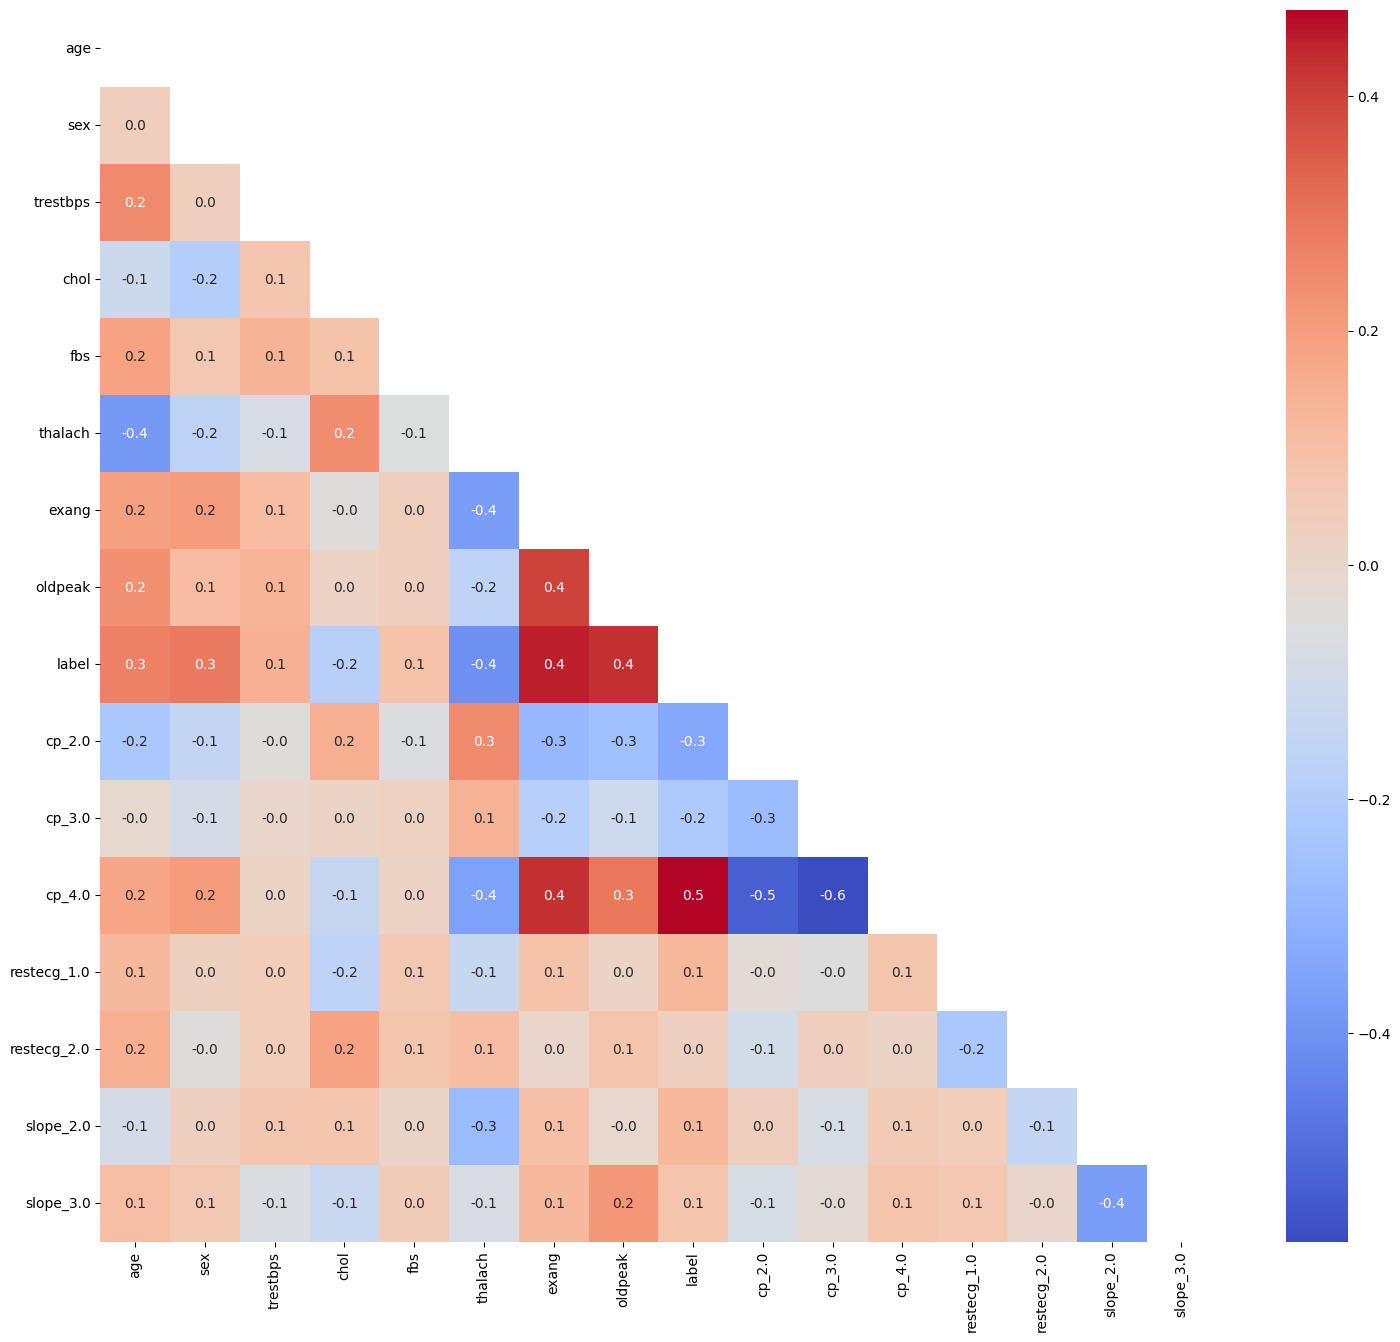

In [ ]:
# Plot correlation matrix once again with adjusted variables / Plotear matriz de correlación una vez más con las variables ajustadas
plt.figure(figsize=(18,16))
df_corr = df_scaled.corr().transpose()
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='coolwarm')
plt.show()

In [ ]:
# Define function for removing irrelevant variables (correlation < threshold, by default 0.05) / Definir función para eliminar variables irrelevantes (correlación < threshold, por defecto 0.05)
def irrelevant_variables(df, df_test, target, threshold = 0.05):
    cor = df.corr(numeric_only = True)
    cor = cor[target]
    irrelevant_vars = cor.index[np.abs(cor.values) < threshold].tolist()    
    df = df.drop(irrelevant_vars, axis = 1)
    df_test = df_test.drop(irrelevant_vars, axis = 1)
    
    print(f' The variables {irrelevant_vars} have been removed from the dataset.')
    return df, df_test

# Remove irrelevant variables / Eliminar variables irrelevantes
df_new, df_test_new = irrelevant_variables(df_scaled, df_test_scaled, 'label', 0.1)

 The variables ['fbs', 'restecg_2.0', 'slope_3.0'] have been removed from the dataset.


### 10) Eliminar variables redundantes

Redundant variables: high correlation with other dependent variable / 

Variables redundantes: alta correlación con otra variable dependiente

In [ ]:
# Define function for removing redundant variables (correlation > threshold, by default 0.99) / Definir función para eliminar variables redundantes (correlación > threshold, por defecto 0.99)
def redundant_variables(df, df_test, threshold = 0.99):
    cor = df.corr(numeric_only = True)
    cor = np.abs(cor) > threshold
    redundant_vars = []
    for c in cor.columns.values:
        if (c in cor.columns.values):
            cor_values = cor[c] 
            cor_values.values[cor_values.index == c] = False # Do not take into account correlation with itself
            redundant_columns = cor.index[cor_values.values].tolist()
            cor = cor.drop(redundant_columns, axis = 1)
            redundant_vars.extend(redundant_columns)

    df = df.drop(redundant_vars, axis = 1)
    df_test = df_test.drop(redundant_vars, axis = 1)

    print(f'The variables {redundant_vars} have been removed from the dataset.')
    return df, df_test

# Perform redundant variables removal / Realizar eliminación de variables redundantes
df_new, df_test_new = redundant_variables(df_new, df_test_new)

The variables [] have been removed from the dataset.


### 11) Oversampling

Debido a que ya tenemos una muestra equilibrada del target binario, no hace falta hacer un Subsampling ni Oversampling para clasificación binaria.

Pero para la clasificación multi-class sí:

In [ ]:
# Show the distribution of the classes of the target 'label' / Mostrar la distribución de las clases del target 'label'
df_new['label'].value_counts(normalize=True)

0    0.485333
1    0.214667
2    0.144000
3    0.124000
4    0.032000
Name: label, dtype: float64

In [ ]:
# Define function for oversampling: duplicate rows of the minority class / Definir función para oversampling: duplicar filas de la clase minoritaria
def oversampling(df, value_to_sample, percentage, base_value_sample=0):
    oversampling = df[df['label'] == value_to_sample].sample(int(percentage*df[df['label'] == base_value_sample].shape[0]),
                                                                      replace = True,       # puede duplicar varias veces la misma fila
                                                                      random_state = 0,     # para que sea reproducible
                                                                      axis = 0)
    return oversampling

# Perform oversampling and concatenate the two dataframes with the oversamplings for each minority class / Realizar oversampling y concatenar los dos dataframes con los oversamplings para cada clase minoritaría
df_sampled = pd.concat([df_new, oversampling(df_new, 1, 0.6), oversampling(df_new, 2, 0.75), oversampling(df_new, 3, 0.75), oversampling(df_new, 4, 0.85)], axis=0) 

# Check that oversampling has been done correctly / Comprobar que se ha hecho bien el oversampling
df_sampled['label'].value_counts(normalize=True)


2    0.208996
1    0.207899
3    0.200768
0    0.199671
4    0.182666
Name: label, dtype: float64

### Guardar datos en x y y (train, test, val)

In [ ]:
# Split dataset into independent variables X & the target y / Dividir dataset en variables independientes X y el target y
X = df_sampled.copy()
X = X.drop(columns=['label', 'split']).reset_index(drop=True)
y = df_sampled.copy()
y = y['label'].reset_index(drop=True)

print('Dataset sucessfully splitted into independent variables X & the target y.')

Dataset sucessfully splitted into independent variables X & the target y.


In [ ]:
# separar el dataset: df_train
df_train = df_sampled.copy()
df_train = df_sampled.drop(df_sampled[df_sampled.split != 'train'].index)

# separar el dataset: df_val
df_val = df_sampled.copy()
df_val = df_sampled.drop(df_sampled[df_sampled.split != 'val'].index)

for df in [df_train, df_val]:
    df.drop('split', axis=1, inplace=True)

print('Dataset sucessfully splitted into df_train & df_val and column "split" eliminated.')

Dataset sucessfully splitted into df_train & df_val and column "split" eliminated.


### 12) Variable Importance

In [ ]:
# check that the columns of the datasets are the same and have the same order / verificar que las columnas de los datasets son las mismas y tienen el mismo orden
df_train.columns,df_val.columns,df_test_new.columns

(Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
        'label', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0', 'slope_2.0'],
       dtype='object'),
 Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
        'label', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0', 'slope_2.0'],
       dtype='object'),
 Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
        'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0', 'slope_2.0'],
       dtype='object'))

In [ ]:
# Divide the dataset into independent variables X & the target y for train, test & val / Dividir el dataset en variables independientes X y el target y para train, test & val

# independent variables/ variables independientes
xcol = df_test_new.columns.to_list()
X_test = df_test_new
X_train = df_train[xcol]
X_val = df_val[xcol]

# target variable for multiclass classification / variable objetivo para clasificación multiclase
y_train = df_train['label']
y_val = df_val['label']

In [ ]:
# Define and train the model for variable importance / Definir y entrenar el modelo para la importancia de variables
model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train, y_train) 

# Perform permutation importance / Realizar importancia por permutación
importance = permutation_importance(model, 
                                    X_val, 
                                    y_val, 
                                    random_state = 1)

importance_var = pd.DataFrame({'variable' : X_train.columns.values, 'imp' : np.abs(importance.importances_mean)/np.max(np.abs(importance.importances_mean))}).sort_values(by = 'imp', ascending = False)
importance_var

,variable,imp
6,oldpeak,1.000000
4,thalach,0.786096
0,age,0.454545
5,exang,0.433155
9,cp_4.0,0.422460
1,sex,0.411765
2,trestbps,0.347594
3,chol,0.326203
11,slope_2.0,0.304813
10,restecg_1.0,0.080214


In [ ]:
# Save important variables as a list / Guardar variables importantes como lista
important_vars = importance_var['variable'].tolist()
important_vars

['oldpeak',
 'thalach',
 'age',
 'exang',
 'cp_4.0',
 'sex',
 'trestbps',
 'chol',
 'slope_2.0',
 'restecg_1.0',
 'cp_2.0',
 'cp_3.0']

### 13) PCA

In [ ]:
from sklearn.decomposition import PCA

# Define and train the model for PCA / Definir y entrenar el modelo para PCA
threshold = 0.8
pca = PCA()
pca.fit(X_train)

# Perform PCA / Realizar PCA
dat_pca = pd.DataFrame(pca.transform(X))

variance_explained = np.cumsum(pca.explained_variance_ratio_)
n_components = np.min(np.where(variance_explained > threshold)) + 1
dat_new = dat_pca.iloc[:,0:n_components]
dat_new

,0,1,2,3,4
0,0.887913,0.535879,-0.837387,-0.458089,0.105813
1,-0.570390,0.792046,0.255579,0.235954,1.953164
2,-0.673797,-0.784655,-1.194693,-1.410604,-0.232754
3,0.865991,-0.090760,0.198136,-0.420095,0.472968
4,1.697133,-0.551837,-0.656867,-0.295938,-0.369766
...,...,...,...,...,...
1818,0.227412,0.692509,-0.806291,1.635656,0.372158
1819,-2.111320,-0.538520,1.818135,-0.154312,-0.014401
1820,-0.214536,2.588757,-0.322726,0.397001,0.087913
1821,0.228624,-0.019763,-1.283461,1.130924,0.877372


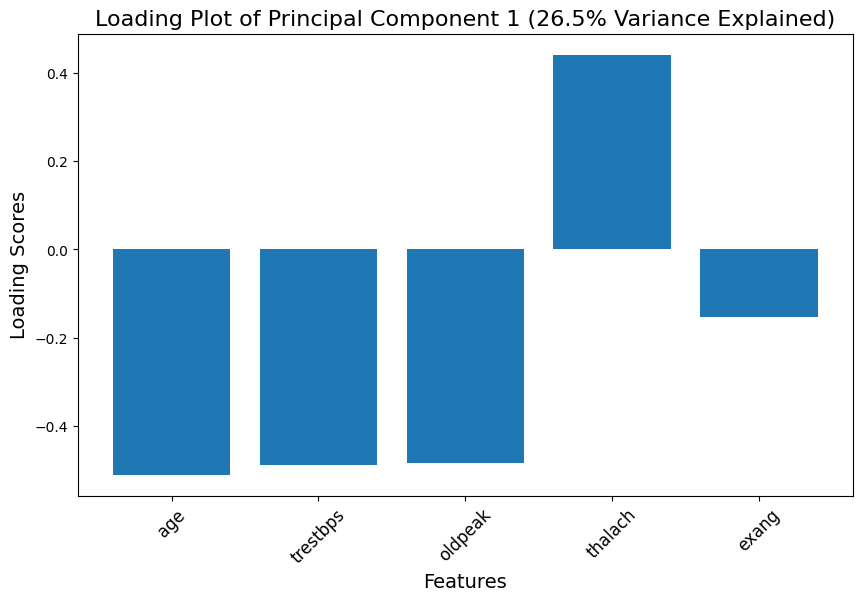

In [ ]:
# Define function to get the top features from PCA / Definir función para obtener las variables más importantes de PCA
def get_topfeatures_scores(pca, X, n_components):
    loading_scores = pd.Series(pca.components_[0], index=X.columns)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    top_features = sorted_loading_scores[0:n_components].index.values
    return top_features,loading_scores

# Get the top features from PCA / Obtener las variables más importantes de PCA
top_features, loading_scores = get_topfeatures_scores(pca, X, 5)

# Plot the loading scores / Plotear los loading scores
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(len(top_features)), loading_scores[top_features])
ax.set_xticks(range(len(top_features)))
ax.set_xticklabels(top_features, rotation=45, fontsize=12)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Loading Scores', fontsize=14)
ax.set_title('Loading Plot of Principal Component 1 ({:.1f}% Variance Explained)'.format(pca.explained_variance_ratio_[0]*100), fontsize=16)
plt.show()

## PREDICCIÓN CON GRID SEARCH

The Grid Search is a method to find the best hyperparameters for a model. It is a brute force method that tries all the possible combinations of hyperparameters and returns the best one. /

El Grid Search es un método para encontrar los mejores hiperparámetros para un modelo. Es un método de fuerza bruta que prueba todas las combinaciones posibles de hiperparámetros y devuelve la mejor.

### Hiperparametros y modelos para el Grid Search

In [ ]:
# Set hyperparameters ranges / Definir rangos de hiperparámetros
lr_params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
dt_params = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}
svm_params = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
xgb_params = {'max_depth': [5, 10, 15], 'learning_rate': [0.01, 0.1, 1], 'n_estimators': [50, 100, 200]}

# Set models to perform grid search on / Definir modelos para realizar grid search
models = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'params': lr_params,
        'variables': important_vars
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'params': dt_params,
        'variables': important_vars
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': rf_params,
        'variables': important_vars
    },
    {
        'name': 'SVM',
        'model': SVC(),
        'params': svm_params,
        'variables': important_vars
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(),
        'params': xgb_params,
        'variables': important_vars
    }
]

### Train: Predicción y evaluación

In [ ]:
# Perform grid search on each model / Realizar grid search en cada modelo
grid_results = pd.DataFrame()
for model in models:
    print(f"PERFORMING GRID SEARCH FOR: {model['name']}...")
    clf = GridSearchCV(model['model'], model['params'], cv=5, scoring='f1_micro')

    # Perform grid search on different amount of variables / Realizar grid search en diferentes cantidades de variables
    for i in range(len(model['variables'])):
      print(f"Grid Search {i} de {model['name']}...")
      print(f"Variables X: {model['variables']}")
      X_train_new = X_train[model['variables']]
      X_test_new = X_test[model['variables']]
      X_val_new = X_val[model['variables']]
  
      # Grid Search Results
      clf.fit(X_train_new, np.array(y_train))
      print(f"Mejores parametros: {clf.best_params_}")
      print(f"Mejor F1 score: {clf.best_score_}")
      print("\n")
      grid_results =  pd.concat([grid_results, pd.DataFrame(data={'model':model['name'],'variables': [model['variables']], 'params': [clf.best_params_],'f1_score_micro': [clf.best_score_]})], ignore_index=True)

      # Eliminar último elemento de la lista de las variables
      model['variables'] = model['variables'][:-1] 

PERFORMING GRID SEARCH FOR: Logistic Regression...
Grid Search 0 de Logistic Regression...
Variables X: ['oldpeak', 'thalach', 'age', 'exang', 'cp_4.0', 'sex', 'trestbps', 'chol', 'slope_2.0', 'restecg_1.0', 'cp_2.0', 'cp_3.0']


C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: Conve

Mejores parametros: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor F1 score: 0.46228373702422143


Grid Search 1 de Logistic Regression...
Variables X: ['oldpeak', 'thalach', 'age', 'exang', 'cp_4.0', 'sex', 'trestbps', 'chol', 'slope_2.0', 'restecg_1.0', 'cp_2.0']


C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: Conve

Mejores parametros: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Mejor F1 score: 0.4588235294117647


Grid Search 2 de Logistic Regression...
Variables X: ['oldpeak', 'thalach', 'age', 'exang', 'cp_4.0', 'sex', 'trestbps', 'chol', 'slope_2.0', 'restecg_1.0']


C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: Conve

Mejores parametros: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor F1 score: 0.46159169550173


Grid Search 3 de Logistic Regression...
Variables X: ['oldpeak', 'thalach', 'age', 'exang', 'cp_4.0', 'sex', 'trestbps', 'chol', 'slope_2.0']


C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: Conve

Mejores parametros: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor F1 score: 0.45536332179930794


Grid Search 4 de Logistic Regression...
Variables X: ['oldpeak', 'thalach', 'age', 'exang', 'cp_4.0', 'sex', 'trestbps', 'chol']


KeyboardInterrupt: 

In [ ]:
# Show grid search results / Mostrar resultados de grid search
grid_results

,model,variables,params,f1_score_micro
0,Logistic Regression,"[oldpeak, age, thalach, chol, cp_4.0, sex, tre...","{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.462284
1,Logistic Regression,"[oldpeak, age, thalach, chol, cp_4.0, sex, tre...","{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.458824
2,Logistic Regression,"[oldpeak, age, thalach, chol, cp_4.0, sex, tre...","{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.456055
3,Logistic Regression,"[oldpeak, age, thalach, chol, cp_4.0, sex, tre...","{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.455363
4,Logistic Regression,"[oldpeak, age, thalach, chol, cp_4.0, sex, tre...","{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.444291
5,Logistic Regression,"[oldpeak, age, thalach, chol, cp_4.0, sex, tre...","{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.452595
6,Logistic Regression,"[oldpeak, age, thalach, chol, cp_4.0, sex]","{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.453979
7,Logistic Regression,"[oldpeak, age, thalach, chol, cp_4.0]","{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.438754
8,Logistic Regression,"[oldpeak, age, thalach, chol]","{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.413149
9,Logistic Regression,"[oldpeak, age, thalach]","{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.393080


### Sortear y filtrar los resultados del Grid Search

In [ ]:
# Get the best result of each model / Obtener el mejor resultado de cada modelo
idx = grid_results.groupby(grid_results['model'])['f1_score_micro'].idxmax().sort_values(ascending=False)
best_models = grid_results.loc[idx]
best_models

,model,variables,params,f1_score_micro
49,XGBoost,"[oldpeak, age, thalach, chol, cp_4.0, sex, tre...","{'learning_rate': 1, 'max_depth': 15, 'n_estim...",0.935640
37,SVM,"[oldpeak, age, thalach, chol, cp_4.0, sex, tre...","{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.843599
24,Random Forest,"[oldpeak, age, thalach, chol, cp_4.0, sex, tre...","{'max_depth': 15, 'n_estimators': 100}",0.941176
19,Decision Tree,"[oldpeak, age, thalach, chol, cp_4.0]","{'max_depth': 15, 'min_samples_split': 2}",0.903114
0,Logistic Regression,"[oldpeak, age, thalach, chol, cp_4.0, sex, tre...","{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.462284


In [ ]:
print(f'''El mejor modelo es: {best_models.iloc[0].model} con
      
- variables: {best_models.iloc[0].variables} 
- parametros: {best_models.iloc[0].params}
- F1 Score (Micro): {best_models.iloc[0].f1_score_micro}''')

El mejor modelo es: XGBoost con
      
- variables: ['oldpeak', 'age', 'thalach', 'chol', 'cp_4.0', 'sex', 'trestbps', 'slope_2.0', 'restecg_1.0', 'cp_2.0', 'exang'] 
- parametros: {'learning_rate': 1, 'max_depth': 15, 'n_estimators': 100}
- F1 Score (Micro): 0.9356401384083044


### Test: Predicción y evaluación

In [ ]:
# Concatenate train and val / Juntar train y val
X_train_all = pd.concat((X_train, X_val), axis = 0)
y_train_all = np.concatenate((y_train, y_val), axis = 0)

((1823, 12), (1823,))

In [ ]:
# Perform grid search on each model with the best result / Realizar grid search en cada modelo con el mejor resultado

for i, row in best_models.iterrows():
    model_name = row['model']
    variables = row['variables']
    params = row['params']

    # Get the training and testing data for the selected variables / Obtenemos los datos de entrenamiento y testeo para las variables seleccionadas
    X_test_final = X_test[variables]
    X_train_final = X_train_all[variables]

    # Create the model with the given parameters / Construir el modelo con los parámetros dados
    if row['model'] == "Logistic Regression":
      model = LogisticRegression(**params)
    elif row['model'] == "Decision Tree":
      model = DecisionTreeClassifier(**params)
    elif row['model'] == "Random Forest":
      model = RandomForestClassifier(**params)
    elif row['model'] == "SVM":
      model = SVC(**params)
    else:
      model = XGBClassifier(**params)

    # Train the model and make predictions on the test data / Entrenar el modelo y hacer predicciones en los datos de testeo
    model.fit(X_train_final, y_train_all)
    pred_test = model.predict(X_test_final)

    # Create a dataframe with the predictions and save to CSV / Crear un dataframe con las predicciones y guardar a CSV
    pred_df = pd.DataFrame({'ID': X_test_final.index.values, 'label': pred_test.astype(int)})
    folder = "results"
    if not os.path.exists(folder):
        os.makedirs(folder)
    pred_df.to_csv(f'{folder}/predictions_{model_name}.csv', index=False)

## CONCLUSIONES

El objetivo de este proyecto ha sido predecir la presencia de enfermedad cardíaca en función de un conjunto de 13 variables. Hemos hecho un Análisis Exploratorio de Datos para entender los datos y luego hemos preprocesado los datos para poder usarlos en un modelo de Machine Learning. Hemos utilizado un Grid Search para encontrar los mejores hiperparámetros para el modelo y luego hemos evaluado el modelo con el dataset de test.

Parece que el modelo que da mejores resultados es el XGBoost con las siguientes variables teniendo el mayor impacto en tener una enfermedad cardíaca:
*'oldpeak', 'age', 'thalach', 'chol', 'cp_4.0', 'sex', 'trestbps', 'slope_2.0', 'restecg_1.0', 'cp_2.0', 'exang'*

Este proyecto ha sido una gran oportunidad para aprender y practicar todo el proceso de un proyecto de Data Science. Hemos podido aplicar todos los conocimientos adquiridos durante el curso y también hemos aprendido cosas nuevas que no sabíamos antes.